<a href="https://www.kaggle.com/code/zlemdilekacar/brain-tumor-segmentation?scriptVersionId=199153678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS_2018_Data_Training/survival_data.csv
/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AXJ_1/Brats18_CBICA_AXJ_1_t2.nii
/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AXJ_1/Brats18_CBICA_AXJ_1_seg.nii
/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AXJ_1/Brats18_CBICA_AXJ_1_t1.nii
/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AXJ_1/Brats18_CBICA_AXJ_1_flair.nii
/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_CBICA_AXJ_1/Brats18_CBICA_AXJ_1_t1ce.nii
/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS_2018_Data_Training/HGG/Brats18_2013_3_1/Brats18_2013_3_1_t1.nii
/kaggle/input/brain-tumor-segmentation-in-mri-brats-2

In [2]:
import glob
import os
import skimage.io as io
import matplotlib.pyplot as plt
import random as r

In [3]:
root_path = '/kaggle/input/brain-tumor-segmentation-in-mri-brats-2015/MICCAI_BraTS2020_TrainingData'

In [4]:
flair = glob.glob(os.path.join(root_path, '**', '*flair.nii'), recursive=True)

In [5]:
seg = glob.glob(os.path.join(root_path, '**', '*seg.nii'), recursive=True)

In [6]:
t1 = glob.glob(os.path.join(root_path, '**', '*t1.nii'), recursive=True)

In [7]:
t1ce = glob.glob(os.path.join(root_path, '**', '*t1ce.nii'), recursive=True)

In [8]:
t2 = glob.glob(os.path.join(root_path, '**', '*t2.nii'), recursive=True)

In [9]:
s = io.imread(seg[1], plugin = 'simpleitk')
f = io.imread(flair[1], plugin = 'simpleitk')
t_1 = io.imread(t1[1], plugin = 'simpleitk')
t_1ce = io.imread(t1ce[1], plugin = 'simpleitk')
t_2 = io.imread(t2[1], plugin = 'simpleitk')

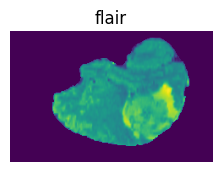

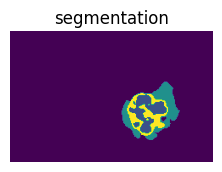

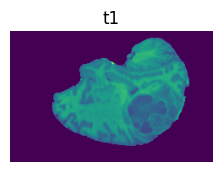

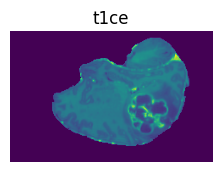

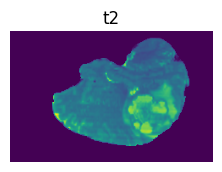

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(2,4,1)
plt.title('flair')
plt.axis('off')
plt.imshow(f[:,:,90])

plt.figure(figsize=(12,10))
plt.subplot(2,4,2)
plt.title('segmentation')
plt.axis('off')
plt.imshow(s[:,:,90])

plt.figure(figsize=(12,10))
plt.subplot(2,4,3)
plt.title('t1')
plt.axis('off')
plt.imshow(t_1[:,:,90])

plt.figure(figsize=(12,10))
plt.subplot(2,4,4)
plt.title('t1ce')
plt.axis('off')
plt.imshow(t_1ce[:,:,90])

plt.figure(figsize=(12,10))
plt.subplot(2,4,5)
plt.title('t2')
plt.axis('off')
plt.imshow(t_2[:,:,90])

In [11]:
def train_array(path,end):
    files = glob.glob(os.path.join(path, '**', end), recursive=True)
    img_list = []
    r.seed(19)
    
    for file in files[:100]:
        img = io.imread(file, plugin= 'simpleitk')
        img = (img - img.mean()) /img.std()
        img.astype('float32')
        
        for slice in range(60,130):
            img_s = img[slice,:,:]
            img_s = np.expand_dims(img_s, axis=0)
            img_list.append(img_s)
            
    return np.array(img_list)

In [12]:
def seg_array(path,end, label):
    files = glob.glob(os.path.join(path, '**', end), recursive=True)
    img_list = []
    r.seed(19)
    
    for file in files[:100]:
        img = io.imread(file, plugin= 'simpleitk')
        if label == 1:
            img[img!= 0] = 1 #tam tümör
            
        if label == 2:
            img[img!= 1] = 0 #nekroz
        
        if label == 3:
            img[img== 2] = 0 #ödemsiz tümör
            img[img!= 0] = 1 

        if label == 4:
            img[img!= 4] = 0 #genişleyen tümör
            img[img== 4] = 1
        
        
        img.astype('float32')
        
        for slice in range(60,130):
            img_s = img[slice,:,:]
            img_s = np.expand_dims(img_s, axis=0)
            img_list.append(img_s)
            
    return np.array(img_list)

In [13]:
seg_tam = seg_array(root_path,'*seg.nii', 1)
seg_nekroz = seg_array(root_path,'*seg.nii', 2)
seg_odemsiz = seg_array(root_path,'*seg.nii', 3)
seg_genisleyen = seg_array(root_path,'*seg.nii', 4)
seg_orj = seg_array(root_path,'*seg.nii', 0)


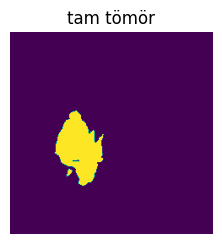

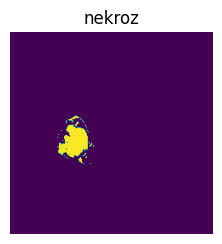

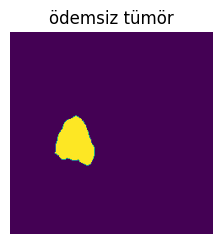

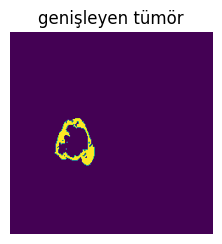

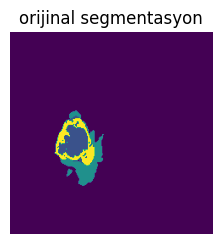

In [14]:
x = 719
plt.figure(figsize=(12,10))
plt.subplot(2,4,1)
plt.title('tam tömör')
plt.axis('off')
plt.imshow(seg_tam[x].reshape(240,240))

plt.figure(figsize=(12,10))
plt.subplot(2,4,2)
plt.title('nekroz')
plt.axis('off')
plt.imshow(seg_nekroz[x].reshape(240,240))

plt.figure(figsize=(12,10))
plt.subplot(2,4,3)
plt.title('ödemsiz tümör')
plt.axis('off')
plt.imshow(seg_odemsiz[x].reshape(240,240))

plt.figure(figsize=(12,10))
plt.subplot(2,4,4)
plt.title('genişleyen tümör')
plt.axis('off')
plt.imshow(seg_genisleyen[x].reshape(240,240))

plt.figure(figsize=(12,10))
plt.subplot(2,4,5)
plt.title('orijinal segmentasyon')
plt.axis('off')
plt.imshow(seg_orj[x].reshape(240,240))